In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

PATH = "/content/sample_data/Datathon/"

df_history = pd.read_csv(PATH + 'customer_history.csv')
df_customers = pd.read_csv(PATH + 'customers.csv')
df_ref_train = pd.read_csv(PATH + 'referance_data.csv')
df_ref_test = pd.read_csv(PATH + 'referance_data_test.csv')
df_sample_sub = pd.read_csv(PATH + 'sample_submission.csv')

print("Veri Okuma Tamamlandı.")

Veri Okuma Tamamlandı.


In [ ]:
df_history.shape

(5359609, 7)

In [ ]:
df_customers.shape

(176293, 8)

In [ ]:
df_ref_train.shape

(133287, 3)

In [ ]:
df_ref_test.shape

(43006, 2)

In [ ]:
df_sample_sub.shape

(43006, 2)

In [ ]:
# 1. Tarih Formatlarını Düzeltme
df_history['date'] = pd.to_datetime(df_history['date'])
df_ref_train['ref_date'] = pd.to_datetime(df_ref_train['ref_date'])
df_ref_test['ref_date'] = pd.to_datetime(df_ref_test['ref_date'])

In [ ]:
dataframes = {
    "df_history": df_history,
    "df_customers": df_customers,
    "df_ref_train": df_ref_train,
    "df_ref_test": df_ref_test,
    "df_sample_sub": df_sample_sub
}

for name, df in dataframes.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

Missing values in df_history:
cust_id                             0
date                                0
mobile_eft_all_cnt             112334
active_product_category_nbr         0
mobile_eft_all_amt             112334
cc_transaction_all_amt         166746
cc_transaction_all_cnt         166746
dtype: int64


Missing values in df_customers:
cust_id            0
gender             0
age                0
province           0
religion           0
work_type          0
work_sector    30134
tenure             0
dtype: int64


Missing values in df_ref_train:
cust_id     0
ref_date    0
churn       0
dtype: int64


Missing values in df_ref_test:
cust_id     0
ref_date    0
dtype: int64


Missing values in df_sample_sub:
cust_id    0
churn      0
dtype: int64




In [ ]:
cols_to_fill_zero = ['mobile_eft_all_cnt', 'mobile_eft_all_amt', 'cc_transaction_all_amt', 'cc_transaction_all_cnt']
df_history[cols_to_fill_zero] = df_history[cols_to_fill_zero].fillna(0)


In [ ]:
df_customers['work_sector'].fillna('MISSING', inplace=True)


/tmp/ipython-input-445067342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers['work_sector'].fillna('MISSING', inplace=True)


In [ ]:
dataframes = {
    "df_history": df_history,
    "df_customers": df_customers,
    "df_ref_train": df_ref_train,
    "df_ref_test": df_ref_test,
    "df_sample_sub": df_sample_sub
}

for name, df in dataframes.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

Missing values in df_history:
cust_id                        0
date                           0
mobile_eft_all_cnt             0
active_product_category_nbr    0
mobile_eft_all_amt             0
cc_transaction_all_amt         0
cc_transaction_all_cnt         0
dtype: int64


Missing values in df_customers:
cust_id        0
gender         0
age            0
province       0
religion       0
work_type      0
work_sector    0
tenure         0
dtype: int64


Missing values in df_ref_train:
cust_id     0
ref_date    0
churn       0
dtype: int64


Missing values in df_ref_test:
cust_id     0
ref_date    0
dtype: int64


Missing values in df_sample_sub:
cust_id    0
churn      0
dtype: int64




In [ ]:
# Sırada: Eğitim ve Test Verilerini Birleştirme
df_ref_train['is_train'] = 1
df_ref_test['is_train'] = 0
df_ref_test['churn'] = np.nan
df_ref_all = pd.concat([df_ref_train, df_ref_test], ignore_index=True)


In [ ]:
print(df_ref_all.shape)
print(df_ref_all['is_train'].value_counts())
print(df_ref_all['churn'].isnull().sum())


(176293, 4)
is_train
1    133287
0     43006
Name: count, dtype: int64
43006


In [ ]:
unique_customers = df_history['cust_id'].nunique()
print(f"Benzersiz müşteri sayısı: {unique_customers}")


Benzersiz müşteri sayısı: 176293


In [ ]:
#  df_ref_all ile df_customers'ı birleştir
df_master = pd.merge(
    df_ref_all,
    df_customers,
    on='cust_id',
    how='left'  # tüm df_ref_all satırlarını koru
)

# 2Merge sonrası kontroller
print("df_master shape:", df_master.shape)
print("is_train value counts:\n", df_master['is_train'].value_counts())
print("churn null count (test set):", df_master['churn'].isnull().sum())
print("Demografik kolonlarda null sayısı:\n", df_master[['gender','age','province','religion','work_type','work_sector','tenure']].isnull().sum())

# 3️⃣ İlk 5 satırı göster
df_master.head()


df_master shape: (176293, 11)
is_train value counts:
 is_train
1    133287
0     43006
Name: count, dtype: int64
churn null count (test set): 43006
Demografik kolonlarda null sayısı:
 gender         0
age            0
province       0
religion       0
work_type      0
work_sector    0
tenure         0
dtype: int64


,cust_id,ref_date,churn,is_train,gender,age,province,religion,work_type,work_sector,tenure
0,0,2017-09-01,0.0,1,F,64,NOH,U,Part-time,Technology,135
1,3,2018-10-01,0.0,1,F,22,ZUI,C,Student,MISSING,47
2,5,2018-03-01,1.0,1,M,27,ZUI,U,Full-time,Finance,108
3,6,2018-04-01,1.0,1,F,40,NOH,U,Unemployed,MISSING,187
4,7,2018-05-01,0.0,1,F,64,GEL,U,Part-time,Public Sector,218


In [ ]:
#Merge df_history ile df_master
df_history_filtered = df_history.merge(df_master[['cust_id','ref_date']], on='cust_id', how='left')


In [ ]:
#Gün farkını hesaplama
df_history_filtered['date_diff'] = (df_history_filtered['ref_date'] - df_history_filtered['date']).dt.days


In [ ]:
#Son 6 ay filtrelemesi
df_history_6m = df_history_filtered[(df_history_filtered['date_diff'] > 0) & (df_history_filtered['date_diff'] <= 180)]


In [ ]:
#Aggregate işlemleri
agg_dict_6m = {
    'mobile_eft_all_cnt': ['sum', 'mean'],
    'mobile_eft_all_amt': ['sum', 'mean'],
    'cc_transaction_all_cnt': ['sum', 'mean'],
    'cc_transaction_all_amt': ['sum', 'mean'],
    'active_product_category_nbr': 'max'
}
df_history_agg = df_history_6m.groupby('cust_id').agg(agg_dict_6m).reset_index()


In [ ]:
#Sütun isimlerini netleştirme
df_history_agg.columns = ['cust_id',
                          'mobile_eft_cnt_6m_sum', 'mobile_eft_cnt_6m_mean',
                          'mobile_eft_amt_6m_sum', 'mobile_eft_amt_6m_mean',
                          'cc_cnt_6m_sum', 'cc_cnt_6m_mean',
                          'cc_amt_6m_sum', 'cc_amt_6m_mean',
                          'max_prod_cat_6m']


In [ ]:
#df_master ile merge
df_master = df_master.merge(df_history_agg, on='cust_id', how='left')


In [ ]:
print(df_master.shape)
print(df_master[['mobile_eft_cnt_6m_sum','cc_cnt_6m_sum']].isnull().sum())


(176293, 20)
mobile_eft_cnt_6m_sum    0
cc_cnt_6m_sum            0
dtype: int64


In [ ]:
# Müşteri başına kaç işlem satırı olduğunu say
df_history_counts = df_history.groupby('cust_id').size().reset_index(name='transaction_count')

# Kaç müşterinin birden fazla işlemi var
multi_tx_customers = df_history_counts[df_history_counts['transaction_count'] > 1].shape[0]

print(f"Birden fazla işlem yapan müşteri sayısı: {multi_tx_customers}")


Birden fazla işlem yapan müşteri sayısı: 176293


In [ ]:
df_history_agg = df_history_6m.groupby('cust_id').agg(
    # Toplam ve Ortalama Aktivite
    total_eft_cnt=('mobile_eft_all_cnt', 'sum'),
    mean_eft_amt=('mobile_eft_all_amt', 'mean'),
    max_cc_amt=('cc_transaction_all_amt', 'max'),

    # Aktivite Yoğunluğu
    num_unique_months=('date', 'nunique'),  # Kaç ay işlem yapılmış

    # CC İşlemi Yapılan Ay Sayısı
    cc_active_months=('cc_transaction_all_cnt', lambda x: (x > 0).sum()),

    # EFT İşlemi Yapılan Ay Sayısı
    eft_active_months=('mobile_eft_all_cnt', lambda x: (x > 0).sum())
).reset_index()

# Merge ile df_master'a ekleme
df_master = df_master.merge(df_history_agg, on='cust_id', how='left')

In [ ]:
print(df_master.shape)


(176293, 26)


In [ ]:
print(df_master[['total_eft_cnt', 'mean_eft_amt', 'max_cc_amt',
                 'num_unique_months', 'cc_active_months', 'eft_active_months']].isnull().sum())


total_eft_cnt        0
mean_eft_amt         0
max_cc_amt           0
num_unique_months    0
cc_active_months     0
eft_active_months    0
dtype: int64


In [ ]:
print(df_master.columns)


Index(['cust_id', 'ref_date', 'churn', 'is_train', 'gender', 'age', 'province',
       'religion', 'work_type', 'work_sector', 'tenure',
       'mobile_eft_cnt_6m_sum', 'mobile_eft_cnt_6m_mean',
       'mobile_eft_amt_6m_sum', 'mobile_eft_amt_6m_mean', 'cc_cnt_6m_sum',
       'cc_cnt_6m_mean', 'cc_amt_6m_sum', 'cc_amt_6m_mean', 'max_prod_cat_6m',
       'total_eft_cnt', 'mean_eft_amt', 'max_cc_amt', 'num_unique_months',
       'cc_active_months', 'eft_active_months'],
      dtype='object')


In [ ]:
# Son Ay Aktivitesi (date_diff < 31)
last_month_agg = df_history_6m[df_history_6m['date_diff'] < 31].groupby('cust_id').agg(
    last_month_total_cnt=('mobile_eft_all_cnt', 'sum')
).reset_index()

# Önceki 5 Ayın Ortalaması
prev_5_months_agg = df_history_6m[df_history_6m['date_diff'] >= 31].groupby('cust_id').agg(
    prev_5_month_avg_cnt=('mobile_eft_all_cnt', 'mean')
).reset_index()

# Merge ve NaN doldurma
df_master = df_master.merge(last_month_agg, on='cust_id', how='left')
df_master = df_master.merge(prev_5_months_agg, on='cust_id', how='left')
df_master[['last_month_total_cnt', 'prev_5_month_avg_cnt']] = df_master[['last_month_total_cnt', 'prev_5_month_avg_cnt']].fillna(0)

# Aktivite Değişim Oranı
df_master['activity_change_ratio'] = df_master['last_month_total_cnt'] / (df_master['prev_5_month_avg_cnt'] + 1e-6)
df_master['activity_change_ratio'].replace(np.inf, df_master['activity_change_ratio'].max(), inplace=True)


/tmp/ipython-input-3917165047.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['activity_change_ratio'].replace(np.inf, df_master['activity_change_ratio'].max(), inplace=True)


In [ ]:
df_master[['last_month_total_cnt','prev_5_month_avg_cnt','activity_change_ratio']].head()

,last_month_total_cnt,prev_5_month_avg_cnt,activity_change_ratio
0,0.0,2.2,0.000000
1,1.0,1.0,0.999999
2,5.0,3.5,1.428571
3,0.0,5.0,0.000000
4,0.0,0.0,0.000000


In [ ]:
last_2_months_agg = df_history_6m[df_history_6m['date_diff'] <= 60].groupby('cust_id').agg(
    last_months_total_cnt=('mobile_eft_all_cnt', 'sum')
).reset_index()

prev_4_months_agg = df_history_6m[df_history_6m['date_diff'] > 60].groupby('cust_id').agg(
    prev_4_month_avg_cnt=('mobile_eft_all_cnt', 'mean')
).reset_index()

df_master = df_master.merge(last_2_months_agg, on='cust_id', how='left')
df_master = df_master.merge(prev_4_months_agg, on='cust_id', how='left')

df_master[['last_months_total_cnt', 'prev_4_month_avg_cnt']] = df_master[['last_months_total_cnt', 'prev_4_month_avg_cnt']].fillna(0)
df_master['activity_change_ratio_v2'] = df_master['last_months_total_cnt'] / (df_master['prev_4_month_avg_cnt'] + 1e-6)
df_master['activity_change_ratio_v2'].replace(np.inf, df_master['activity_change_ratio_v2'].max(), inplace=True)


/tmp/ipython-input-4108671520.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['activity_change_ratio_v2'].replace(np.inf, df_master['activity_change_ratio_v2'].max(), inplace=True)


In [ ]:
#Kredi Kartı Aktiflik Oranı

#Son 6 ayda kaç ay CC işlemi yapılmış? (varsa, yoğunluğu sinyal verir)
df_master['cc_activity_ratio'] = df_master['cc_active_months'] / 6
df_master['cc_activity_ratio'].fillna(0, inplace=True)



/tmp/ipython-input-3604738925.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['cc_activity_ratio'].fillna(0, inplace=True)


In [ ]:
#Demografik / Tenure Karışımları

#Tenure ve yaş ile churn arasında sinyal:
df_master['tenure_squared'] = df_master['tenure'] ** 2
df_master['age_squared'] = df_master['age'] ** 2
df_master['tenure_age_interaction'] = df_master['tenure'] * df_master['age']


In [ ]:
df_master.isnull().sum()


,0
cust_id,0
ref_date,0
churn,43006
is_train,0
gender,0
age,0
province,0
religion,0
work_type,0
work_sector,0


In [ ]:
df_master.columns


Index(['cust_id', 'ref_date', 'churn', 'is_train', 'gender', 'age', 'province',
       'religion', 'work_type', 'work_sector', 'tenure',
       'mobile_eft_cnt_6m_sum', 'mobile_eft_cnt_6m_mean',
       'mobile_eft_amt_6m_sum', 'mobile_eft_amt_6m_mean', 'cc_cnt_6m_sum',
       'cc_cnt_6m_mean', 'cc_amt_6m_sum', 'cc_amt_6m_mean', 'max_prod_cat_6m',
       'total_eft_cnt', 'mean_eft_amt', 'max_cc_amt', 'num_unique_months',
       'cc_active_months', 'eft_active_months', 'last_month_total_cnt',
       'prev_5_month_avg_cnt', 'activity_change_ratio',
       'last_months_total_cnt', 'prev_4_month_avg_cnt',
       'activity_change_ratio_v2', 'cc_activity_ratio', 'tenure_squared',
       'age_squared', 'tenure_age_interaction'],
      dtype='object')

In [ ]:
# 1. Yaş Grupları
bins = [0, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
df_master['age_group'] = pd.cut(df_master['age'], bins=bins, labels=labels, right=False)

# 2. İş / Sektör Segmentasyonu (Yüksek Kardinalite Riskiyle Oluşturuluyor)
# NaN değerleri str'ye çevirirken 'nan_nan' olmaması için önce dolduralım
df_master['work_type'] = df_master['work_type'].astype(str).replace('nan', 'MISSING')
df_master['work_sector'] = df_master['work_sector'].astype(str).replace('nan', 'MISSING')
df_master['work_segment'] = df_master['work_type'] + "_" + df_master['work_sector']

# 3. Kategorik Dönüşüm
categorical_cols_v6 = ['gender', 'religion', 'work_type', 'age_group', 'work_segment']
# Province ve work_sector/segment gibi riskli olanları şimdilik modelden dışarıda tutuyoruz.

for col in categorical_cols_v6:
    df_master[col] = df_master[col].astype('category')

print("Yeni Demografik Özellikler df_master'a başarıyla eklendi.")

Yeni Demografik Özellikler df_master'a başarıyla eklendi.


In [ ]:
import numpy as np

# --- 1. Tenure/Age Kategorizasyonu ve Karşılaştırması ---

# 1.1 Hesap Açtığı Yaş
df_master['age_at_account_open'] = df_master['age'] - df_master['tenure'] / 30.4375
df_master['age_at_account_open'] = np.where(df_master['age_at_account_open'] < 0, 0, df_master['age_at_account_open'])

# 1.2 Tenure'ın Yaş Grubuna Göre Normalleştirilmesi
tenure_median_by_age_group = df_master.groupby('age_group', observed=False)['tenure'].transform('median')
df_master['tenure_vs_group_median'] = df_master['tenure'] / tenure_median_by_age_group
df_master['is_tenure_above_median'] = (df_master['tenure'] > tenure_median_by_age_group).astype(int)


# --- 2. Aktivite Yoğunluğunun Normalleştirilmesi (Tenure Etkisi) ---
# total_eft_cnt ve cc_cnt_6m_sum kullanıyoruz
df_master['avg_eft_cnt_per_month'] = df_master['total_eft_cnt'] / df_master['tenure']
df_master['avg_cc_cnt_per_month'] = df_master['cc_cnt_6m_sum'] / df_master['tenure']

for col in ['avg_eft_cnt_per_month', 'avg_cc_cnt_per_month']:
    df_master[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_master[col].fillna(0, inplace=True)


# --- 3. Kategorik Etkileşimler (Target/Mean Encoding Benzeri) ---

# 3.1 Religion için ortalama tenure
religion_tenure_mean_map = df_master.groupby('religion')['tenure'].mean()
df_master['religion_tenure_mean'] = df_master['religion'].map(religion_tenure_mean_map)

# 3.2 Work Type için ortalama CC işlem hacmi
work_type_cc_amt_mean_map = df_master.groupby('work_type')['cc_amt_6m_sum'].mean()
df_master['work_type_cc_amt_mean'] = df_master['work_type'].map(work_type_cc_amt_mean_map)


# --- Güncelleme Kontrolü ---
NEW_FEATURE_COLS = [
    'age_at_account_open', 'tenure_vs_group_median', 'is_tenure_above_median',
    'avg_eft_cnt_per_month', 'avg_cc_cnt_per_month',
    'religion_tenure_mean', 'work_type_cc_amt_mean'
]

print(f"Başarıyla eklenen yeni özellik sayısı: {len(NEW_FEATURE_COLS)}")
print(f"Yeni sütunlar: {NEW_FEATURE_COLS}")


Başarıyla eklenen yeni özellik sayısı: 7
Yeni sütunlar: ['age_at_account_open', 'tenure_vs_group_median', 'is_tenure_above_median', 'avg_eft_cnt_per_month', 'avg_cc_cnt_per_month', 'religion_tenure_mean', 'work_type_cc_amt_mean']


/tmp/ipython-input-207836353.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-207836353.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
df_master[col] = df_master[col].replace([np.inf, -np.inf], np.nan)
df_master[col] = df_master[col].fillna(0)


In [ ]:
# A. TÜM Özellik Listesini Oluşturma (ID, Etiket ve Flag Hariç)
# df_master'dan cust_id, churn, is_train ve ref_date dışındaki tüm sütunları seçiyoruz.
COLUMNS_TO_DROP_MINIMAL = ['cust_id', 'churn', 'is_train', 'ref_date']
# NOT: 'ref_date' sütununu buradan çıkardığınızı varsayıyorum.

X_train = df_master[df_master['is_train'] == 1].drop(columns=COLUMNS_TO_DROP_MINIMAL, errors='ignore')
X_test = df_master[df_master['is_train'] == 0].drop(columns=COLUMNS_TO_DROP_MINIMAL, errors='ignore')
Y_train = df_master[df_master['is_train'] == 1]['churn']

# LightGBM hatası nedeniyle zorunlu çıkarma
COLUMNS_TO_REMOVE_DATETIME = ['last_transaction_date'] # Diğer tarih sütunları
X_train = X_train.drop(columns=COLUMNS_TO_REMOVE_DATETIME, errors='ignore')
X_test = X_test.drop(columns=COLUMNS_TO_REMOVE_DATETIME, errors='ignore')

# Kategorik Sütunların Listesi (GÜNCELLEME)
# Yeni kategorik sinyaller (is_tenure_above_median hariç) burada otomatik olarak yakalanacaktır.
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

print(f"Eğitime Başlanıyor. TOPLAM Özellik Sayısı: {X_train.shape[1]}")
print(f"Kategorik Sütun Sayısı: {len(categorical_cols)}")
# Özellik sayısı şimdi 52 + 7 = 59 civarında olmalı.

# Ardından, V18 model eğitim kodunu çalıştırın.

Eğitime Başlanıyor. TOPLAM Özellik Sayısı: 41
Kategorik Sütun Sayısı: 7


In [ ]:
# 1️⃣ Sayısal sütunları seç
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# 2️⃣ Sonsuz değer kontrolü
inf_counts_train = np.isinf(X_train[numeric_cols]).sum().sum()
inf_counts_test = np.isinf(X_test[numeric_cols]).sum().sum()

print("=== X_train Inf Kontrol ===", inf_counts_train)
print("=== X_test Inf Kontrol ===", inf_counts_test)

# Tenure vs group median
X_train.loc[:, 'tenure_vs_group_median'] = X_train['tenure_vs_group_median'].fillna(X_train['tenure_vs_group_median'].median())
X_test.loc[:, 'tenure_vs_group_median'] = X_test['tenure_vs_group_median'].fillna(X_train['tenure_vs_group_median'].median())

# Age group
X_train.loc[:, 'age_group'] = X_train['age_group'].fillna(X_train['age_group'].mode()[0])
X_test.loc[:, 'age_group'] = X_test['age_group'].fillna(X_train['age_group'].mode()[0])


=== X_train Inf Kontrol === 0
=== X_test Inf Kontrol === 0


In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np


def recall_at_k(y_true, y_prob, k=0.1):
    """
    Tahmin edilen olasılıkların en üst k%'sını pozitif etiketleyerek recall değerini hesaplar.

    Parametreler:
        y_true (list): Gerçek ikili etiketler.
        y_prob (list): Tahmin edilen olasılıklar.
        k (float): Pozitif etiketlenecek olasılıkların yüzdelik dilimi (varsayılan 0.1).

    Döndürür:
        float: En iyi k% tahminlerindeki recall oranı.
    """
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)
    n = len(y_true)
    m = max(1, int(np.round(k * n)))
    order = np.argsort(-y_prob, kind="mergesort")
    top = order[:m]

    tp_at_k = y_true[top].sum()
    P = y_true.sum()

    return float(tp_at_k / P) if P > 0 else 0.0


def lift_at_k(y_true, y_prob, k=0.1):
    """
    Tahmin edilen olasılıkların en üst k%'sını pozitif etiketleyerek lift (precision/prevalence) değerini hesaplar.

    Parametreler:
        y_true (list): Gerçek ikili etiketler.
        y_prob (list): Tahmin edilen olasılıklar.
        k (float): Pozitif etiketlenecek olasılıkların yüzdelik dilimi (varsayılan 0.1).

    Döndürür:
        float: En iyi k% tahminlerindeki lift değeri.
    """
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)
    n = len(y_true)
    m = max(1, int(np.round(k * n)))
    order = np.argsort(-y_prob, kind="mergesort")
    top = order[:m]

    tp_at_k = y_true[top].sum()
    precision_at_k = tp_at_k / m
    prevalence = y_true.mean()

    return float(precision_at_k / prevalence) if prevalence > 0 else 0.0


def convert_auc_to_gini(auc):
    """
    ROC AUC skorunu Gini katsayısına dönüştürür.

    Gini katsayısı, ROC AUC skorunun doğrusal bir dönüşümüdür.

    Parametreler:
        auc (float): ROC AUC skoru (0 ile 1 arasında).

    Döndürür:
        float: Gini katsayısı (-1 ile 1 arasında).
    """
    return 2 * auc - 1


def ing_hubs_datathon_metric(y_true, y_prob):
    """
    Gini, recall@10% ve lift@10% metriklerini birleştiren özel bir metrik hesaplar.

    Metrik, her bir skoru bir baseline modelin metrik değerlerine göre oranlar ve aşağıdaki ağırlıkları uygular:
    - Gini: %40
    - Recall@10%: %30
    - Lift@10%: %30

    Parametreler:
        y_true (list): Gerçek ikili etiketler.
        y_prob (list): Tahmin edilen olasılıklar.

    Döndürür:
        float: Ağırlıklandırılmış bileşik skor.
    """
    # final metrik için ağırlıklar
    score_weights = {
        "gini": 0.4,
        "recall_at_10perc": 0.3,
        "lift_at_10perc": 0.3,
    }

    # baseline modelin her bir metrik için değerleri
    baseline_scores = {
        "roc_auc": 0.6925726757936908,
        "recall_at_10perc": 0.18469015795868773,
        "lift_at_10perc": 1.847159286784029,
    }

    # y_prob tahminleri için metriklerin hesaplanması
    roc_auc = roc_auc_score(y_true, y_prob)
    recall_at_10perc = recall_at_k(y_true, y_prob, k=0.1)
    lift_at_10perc = lift_at_k(y_true, y_prob, k=0.1)

    new_scores = {
        "roc_auc": roc_auc,
        "recall_at_10perc": recall_at_10perc,
        "lift_at_10perc": lift_at_10perc,
    }

    # roc auc değerlerinin gini değerine dönüştürülmesi
    baseline_scores["gini"] = convert_auc_to_gini(baseline_scores["roc_auc"])
    new_scores["gini"] = convert_auc_to_gini(new_scores["roc_auc"])

    # baseline modeline oranlama
    final_gini_score = new_scores["gini"] / baseline_scores["gini"]
    final_recall_score = new_scores["recall_at_10perc"] / baseline_scores["recall_at_10perc"]
    final_lift_score = new_scores["lift_at_10perc"] / baseline_scores["lift_at_10perc"]

    # ağırlıklandırılmış metriğin hesaplanması
    final_score = (
        final_gini_score * score_weights["gini"] +
        final_recall_score * score_weights["recall_at_10perc"] +
        final_lift_score * score_weights["lift_at_10perc"]
    )
    return final_score


In [ ]:
cat_cols_for_model = categorical_cols.copy()

# Eğer province ve work_sector kullanacaksan
for col in ['province', 'work_sector']:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')
        cat_cols_for_model.append(col)

# Fold eğitiminde bunu kullan
trn_data = lgb.Dataset(X_train.iloc[trn_idx], label=Y_train.iloc[trn_idx],
                       categorical_feature=cat_cols_for_model)
val_data = lgb.Dataset(X_train.iloc[val_idx], label=Y_train.iloc[val_idx],
                       categorical_feature=cat_cols_for_model)


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
import numpy as np

# -------------------------
# 1️⃣ Fold ve Tahmin Değişkenleri
# -------------------------
N_SPLITS = 5
SEED = 42
folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

oof_preds = np.zeros(len(X_train))
test_preds = np.zeros(len(X_test))

# -------------------------
# 2️⃣ LightGBM Parametreleri (V18 - Hızlı ve Kararlı)
# -------------------------
lgb_params_v18 = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'n_estimators': 1500,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': 6,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'reg_alpha': 0.5,
    'reg_lambda': 0.5,
    'n_jobs': -1,
    'seed': SEED,
    'verbose': -1,
    'scale_pos_weight': 4.0
}

# -------------------------
# 3️⃣ Fold Bazlı Eğitim
# -------------------------
print(f"\n--- 5-Fold LightGBM Eğitimi Başlıyor (V18) ---\n")

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, Y_train)):
    print(f"--- Fold {fold_ + 1}/{N_SPLITS} Başladı ---")

    trn_data = lgb.Dataset(X_train.iloc[trn_idx], label=Y_train.iloc[trn_idx],
                           categorical_feature=categorical_cols)
    val_data = lgb.Dataset(X_train.iloc[val_idx], label=Y_train.iloc[val_idx],
                           categorical_feature=categorical_cols)

    model = lgb.train(
        lgb_params_v18,
        trn_data,
        valid_sets=[trn_data, val_data],
        callbacks=[lgb.early_stopping(stopping_rounds=150, verbose=False)]
    )

    # OOF ve Test Tahminleri
    oof_preds[val_idx] = model.predict(X_train.iloc[val_idx], num_iteration=model.best_iteration)
    test_preds += model.predict(X_test, num_iteration=model.best_iteration) / N_SPLITS

# -------------------------
# 4️⃣ Özel Datathon Metrik Hesabı
# -------------------------
final_datathon_score = ing_hubs_datathon_metric(Y_train, oof_preds)

print("\n-------------------------------------------------------------")
print(f"Nihai Datathon Skoru (V18 - ROBUST FINE-TUNING): {final_datathon_score:.6f}")
print("-------------------------------------------------------------")



--- 5-Fold LightGBM Eğitimi Başlıyor (V18) ---

--- Fold 1/5 Başladı ---
--- Fold 2/5 Başladı ---
--- Fold 3/5 Başladı ---
--- Fold 4/5 Başladı ---
--- Fold 5/5 Başladı ---

-------------------------------------------------------------
Nihai Datathon Skoru (V18 - ROBUST FINE-TUNING): 1.014937
-------------------------------------------------------------


/tmp/ipython-input-1955478561.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


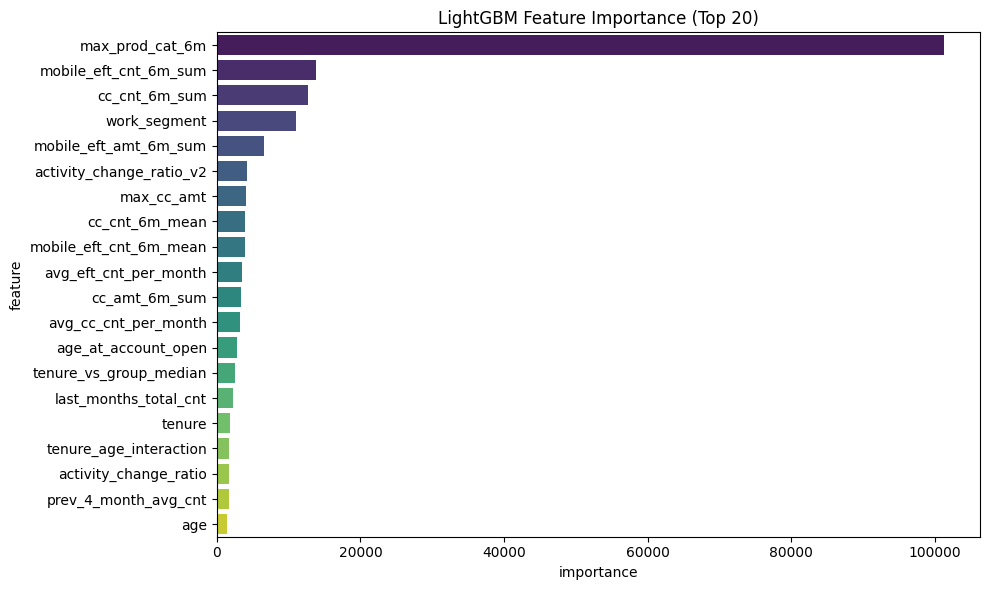

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Son fold modelini kullanarak feature importance alalım
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importance(importance_type='gain')
})

# En önemli 20 özelliği seç
top_features = feature_importance.sort_values(by='importance', ascending=False).head(20)

# Görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title("LightGBM Feature Importance (Top 20)")
plt.tight_layout()
plt.show()


In [ ]:
# 1️⃣ Özellik isimlerini al
feature_names = X_train.columns.tolist()

# 2️⃣ Gain bazlı önemleri al
importances = model.feature_importance(importance_type='gain')

# 3️⃣ DataFrame oluştur ve sıralama yap
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# 4️⃣ En önemli 20 özelliği metinsel olarak yazdır
for i, row in feature_importance_df.head(20).iterrows():
    print(f"{i+1}. {row['feature']} → Önem Skoru: {row['importance']:.2f}")


1. max_prod_cat_6m → Önem Skoru: 101205.41
2. mobile_eft_cnt_6m_sum → Önem Skoru: 13849.66
3. cc_cnt_6m_sum → Önem Skoru: 12705.60
4. work_segment → Önem Skoru: 11075.85
5. mobile_eft_amt_6m_sum → Önem Skoru: 6556.93
6. activity_change_ratio_v2 → Önem Skoru: 4221.28
7. max_cc_amt → Önem Skoru: 4126.82
8. cc_cnt_6m_mean → Önem Skoru: 3956.87
9. mobile_eft_cnt_6m_mean → Önem Skoru: 3918.66
10. avg_eft_cnt_per_month → Önem Skoru: 3483.00
11. cc_amt_6m_sum → Önem Skoru: 3346.57
12. avg_cc_cnt_per_month → Önem Skoru: 3294.87
13. age_at_account_open → Önem Skoru: 2875.16
14. tenure_vs_group_median → Önem Skoru: 2520.15
15. last_months_total_cnt → Önem Skoru: 2230.86
16. tenure → Önem Skoru: 1880.65
17. tenure_age_interaction → Önem Skoru: 1715.91
18. activity_change_ratio → Önem Skoru: 1650.50
19. prev_4_month_avg_cnt → Önem Skoru: 1647.06
20. age → Önem Skoru: 1475.53


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
import numpy as np
import optuna # Optuna kütüphanesini import ediyoruz

# Y_train'i float'tan int'e çevirme (LightGBM genellikle bu formatı tercih eder)
Y_train = Y_train.astype(int)

# -------------------------
# 1️⃣ Optuna Objective Fonksiyonu
# -------------------------

# Bu fonksiyon, Optuna'nın optimize edeceği (minimize edeceği veya maksimize edeceği) skoru döndürür.
def objective(trial):
    N_SPLITS = 5
    SEED = 42
    folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
    oof_preds = np.zeros(len(X_train))

    # ------------------
    # Hiperparametre Aralıkları
    # ------------------
    lgb_params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'n_estimators': 1500, # Yüksek tutulur, early_stopping ile kesilir
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 16, 64),
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.1, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.1, 10.0),
        'scale_pos_weight': trial.suggest_int('scale_pos_weight', 3, 5), # Churn dengesizliği için
        'n_jobs': -1,
        'seed': SEED,
        'verbose': -1,
    }

    # ------------------
    # 5-Fold Eğitim Döngüsü
    # ------------------
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, Y_train)):
        trn_data = lgb.Dataset(X_train.iloc[trn_idx], label=Y_train.iloc[trn_idx])
        val_data = lgb.Dataset(X_train.iloc[val_idx], label=Y_train.iloc[val_idx])

        # Kategorik sütunları manuel olarak belirtmeye gerek yoktur (One-Hot Encoding yaptık)
        # Eğer yapmadıysanız, 'categorical_feature=...' parametresini buraya eklemelisiniz.

        model = lgb.train(
            lgb_params,
            trn_data,
            valid_sets=[val_data],
            callbacks=[lgb.early_stopping(stopping_rounds=150, verbose=False)]
        )

        oof_preds[val_idx] = model.predict(X_train.iloc[val_idx], num_iteration=model.best_iteration)

    # OOF tahminleri üzerinden Datathon Metriğini hesapla
    final_score = ing_hubs_datathon_metric(Y_train, oof_preds)

    # Optuna'nın maksimize etmesi için negatifini döndürün (veya metrik maksimize edilecekse direkt skoru döndürün)
    # Metrik skorunuz 1.0'dan büyük olduğu için maksimizasyon yapıyoruz.
    return final_score


# -------------------------
# 2️⃣ Optimizasyon Çalıştırma
# -------------------------

# Optimizasyon çalışmasını oluşturun
study = optuna.create_study(direction='maximize') # Skoru maksimize ediyoruz

# 100 deneme (trial) çalıştırın. Bu sayıyı istediğiniz gibi artırabilirsiniz.
study.optimize(objective, n_trials=100, show_progress_bar=True)

# -------------------------
# 3️⃣ En İyi Sonuçlar
# -------------------------

print("\n-------------------------------------------------------------")
print(f"En İyi Deneme Skoru (Datathon Metriği): {study.best_value:.6f}")
print("-------------------------------------------------------------")
print("En İyi Parametreler:")
print(study.best_params)

# En iyi parametreleri alıp, tüm X_train üzerinde final modeli eğitilebilir.

[I 2025-10-21 14:46:58,728] A new study created in memory with name: no-name-4909ec8a-f562-4b2e-b820-d533bc40d4a2


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:47:27,738] Trial 0 finished with value: 0.9028737612559912 and parameters: {'learning_rate': 0.03907189755070412, 'num_leaves': 43, 'max_depth': 9, 'min_child_samples': 29, 'colsample_bytree': 0.6582805479622249, 'subsample': 0.8831668386781631, 'reg_alpha': 0.2858691866713307, 'reg_lambda': 0.2811943906377202, 'scale_pos_weight': 4}. Best is trial 0 with value: 0.9028737612559912.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:48:02,398] Trial 1 finished with value: 0.9523011735559124 and parameters: {'learning_rate': 0.0396474053181506, 'num_leaves': 35, 'max_depth': 10, 'min_child_samples': 66, 'colsample_bytree': 0.6710073460887193, 'subsample': 0.8488594664418566, 'reg_alpha': 2.300265336835529, 'reg_lambda': 0.11415368612882103, 'scale_pos_weight': 5}. Best is trial 1 with value: 0.9523011735559124.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:49:17,574] Trial 2 finished with value: 0.9484545193941438 and parameters: {'learning_rate': 0.011576447949168955, 'num_leaves': 20, 'max_depth': 5, 'min_child_samples': 57, 'colsample_bytree': 0.8369267710851278, 'subsample': 0.6967946906179079, 'reg_alpha': 0.12777969458327781, 'reg_lambda': 7.406078412026606, 'scale_pos_weight': 3}. Best is trial 1 with value: 0.9523011735559124.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:49:55,617] Trial 3 finished with value: 0.808584891488858 and parameters: {'learning_rate': 0.020018609010591912, 'num_leaves': 29, 'max_depth': 9, 'min_child_samples': 68, 'colsample_bytree': 0.6571502669337241, 'subsample': 0.6906713830041471, 'reg_alpha': 0.25205893255337514, 'reg_lambda': 2.28009263770116, 'scale_pos_weight': 5}. Best is trial 1 with value: 0.9523011735559124.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:50:37,702] Trial 4 finished with value: 0.9282239440366804 and parameters: {'learning_rate': 0.023488390317756496, 'num_leaves': 36, 'max_depth': 5, 'min_child_samples': 98, 'colsample_bytree': 0.787342089602911, 'subsample': 0.6014276641046797, 'reg_alpha': 4.760156643002833, 'reg_lambda': 0.6145638036336513, 'scale_pos_weight': 5}. Best is trial 1 with value: 0.9523011735559124.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:51:03,736] Trial 5 finished with value: 0.9232848575963727 and parameters: {'learning_rate': 0.08372472643785382, 'num_leaves': 38, 'max_depth': 8, 'min_child_samples': 30, 'colsample_bytree': 0.8317544017402497, 'subsample': 0.8516693939145167, 'reg_alpha': 0.12598675948242688, 'reg_lambda': 1.131696320780026, 'scale_pos_weight': 3}. Best is trial 1 with value: 0.9523011735559124.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:51:49,328] Trial 6 finished with value: 0.7979561905808266 and parameters: {'learning_rate': 0.01389990709860331, 'num_leaves': 62, 'max_depth': 9, 'min_child_samples': 93, 'colsample_bytree': 0.6686352199479828, 'subsample': 0.6437935824599413, 'reg_alpha': 5.222550008375285, 'reg_lambda': 0.18768889314248935, 'scale_pos_weight': 5}. Best is trial 1 with value: 0.9523011735559124.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:52:37,761] Trial 7 finished with value: 0.9680038388492949 and parameters: {'learning_rate': 0.024957165957143007, 'num_leaves': 46, 'max_depth': 7, 'min_child_samples': 50, 'colsample_bytree': 0.8890498584488025, 'subsample': 0.7770289401070587, 'reg_alpha': 1.029414617644114, 'reg_lambda': 3.161831400404494, 'scale_pos_weight': 3}. Best is trial 7 with value: 0.9680038388492949.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:53:18,073] Trial 8 finished with value: 0.8902535038744933 and parameters: {'learning_rate': 0.02075013321844755, 'num_leaves': 49, 'max_depth': 10, 'min_child_samples': 69, 'colsample_bytree': 0.6166423119427251, 'subsample': 0.8747104363499145, 'reg_alpha': 4.0038291077966885, 'reg_lambda': 0.1233573840050891, 'scale_pos_weight': 3}. Best is trial 7 with value: 0.9680038388492949.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:54:46,365] Trial 9 finished with value: 0.9735882637979072 and parameters: {'learning_rate': 0.012102849864333663, 'num_leaves': 45, 'max_depth': 6, 'min_child_samples': 65, 'colsample_bytree': 0.8690529220899136, 'subsample': 0.7471801928485015, 'reg_alpha': 0.13499266675377974, 'reg_lambda': 8.020858991223836, 'scale_pos_weight': 4}. Best is trial 9 with value: 0.9735882637979072.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:55:13,724] Trial 10 finished with value: 0.9784060576289477 and parameters: {'learning_rate': 0.08783668801143459, 'num_leaves': 55, 'max_depth': 6, 'min_child_samples': 85, 'colsample_bytree': 0.7308253241574105, 'subsample': 0.7793939725757792, 'reg_alpha': 0.6371212393412857, 'reg_lambda': 9.114290585299825, 'scale_pos_weight': 4}. Best is trial 10 with value: 0.9784060576289477.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:55:41,657] Trial 11 finished with value: 0.9846052503044957 and parameters: {'learning_rate': 0.09017722667346234, 'num_leaves': 58, 'max_depth': 6, 'min_child_samples': 84, 'colsample_bytree': 0.7378874040048264, 'subsample': 0.790028225546145, 'reg_alpha': 0.6439860519962931, 'reg_lambda': 9.453824883982644, 'scale_pos_weight': 4}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:56:10,817] Trial 12 finished with value: 0.9463981048517758 and parameters: {'learning_rate': 0.09921620622695197, 'num_leaves': 58, 'max_depth': 6, 'min_child_samples': 84, 'colsample_bytree': 0.752624430921879, 'subsample': 0.7976729798917386, 'reg_alpha': 0.753933988377548, 'reg_lambda': 3.786223383712993, 'scale_pos_weight': 4}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:56:49,025] Trial 13 finished with value: 0.9838074159981313 and parameters: {'learning_rate': 0.05699975820520453, 'num_leaves': 54, 'max_depth': 7, 'min_child_samples': 82, 'colsample_bytree': 0.7259485262690301, 'subsample': 0.8066971879215239, 'reg_alpha': 0.8506279305530164, 'reg_lambda': 9.7115777046859, 'scale_pos_weight': 4}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:57:17,731] Trial 14 finished with value: 0.8545209025584336 and parameters: {'learning_rate': 0.06087387784303312, 'num_leaves': 52, 'max_depth': 7, 'min_child_samples': 80, 'colsample_bytree': 0.7236969720578004, 'subsample': 0.815977477638114, 'reg_alpha': 1.5097635551795918, 'reg_lambda': 4.537150974288602, 'scale_pos_weight': 4}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:57:47,965] Trial 15 finished with value: 0.9599646697134419 and parameters: {'learning_rate': 0.06037494702356014, 'num_leaves': 59, 'max_depth': 7, 'min_child_samples': 78, 'colsample_bytree': 0.7711523558037708, 'subsample': 0.7347593449592043, 'reg_alpha': 0.4809083645864166, 'reg_lambda': 1.5632493548631166, 'scale_pos_weight': 4}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:58:22,681] Trial 16 finished with value: 0.9419100860117737 and parameters: {'learning_rate': 0.06493556537442603, 'num_leaves': 63, 'max_depth': 8, 'min_child_samples': 49, 'colsample_bytree': 0.7010661055200539, 'subsample': 0.818312316447287, 'reg_alpha': 2.202897280942388, 'reg_lambda': 0.5418705413725726, 'scale_pos_weight': 4}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:58:57,506] Trial 17 finished with value: 0.9689848872551805 and parameters: {'learning_rate': 0.04291802960310787, 'num_leaves': 52, 'max_depth': 6, 'min_child_samples': 99, 'colsample_bytree': 0.8119591182773892, 'subsample': 0.717696282655881, 'reg_alpha': 0.33558837484085335, 'reg_lambda': 4.865415216513037, 'scale_pos_weight': 3}. Best is trial 11 with value: 0.9846052503044957.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 14:59:32,186] Trial 18 finished with value: 1.0185322874070928 and parameters: {'learning_rate': 0.04944884427177108, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 88, 'colsample_bytree': 0.7021650814400376, 'subsample': 0.8384966481702028, 'reg_alpha': 1.19368969144409, 'reg_lambda': 9.968544618252524, 'scale_pos_weight': 5}. Best is trial 18 with value: 1.0185322874070928.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:00:13,937] Trial 19 finished with value: 1.0170634735989117 and parameters: {'learning_rate': 0.03224719585268725, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 90, 'colsample_bytree': 0.6108319872106962, 'subsample': 0.8490107403541678, 'reg_alpha': 9.587870472904164, 'reg_lambda': 1.9189826217144468, 'scale_pos_weight': 5}. Best is trial 18 with value: 1.0185322874070928.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:00:49,759] Trial 20 finished with value: 1.0167936402687698 and parameters: {'learning_rate': 0.031485191169928636, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 91, 'colsample_bytree': 0.6005859609780262, 'subsample': 0.8467591626922543, 'reg_alpha': 9.03536984387533, 'reg_lambda': 2.035097056980396, 'scale_pos_weight': 5}. Best is trial 18 with value: 1.0185322874070928.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:01:33,211] Trial 21 finished with value: 1.0202751592956867 and parameters: {'learning_rate': 0.02947753714518117, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 92, 'colsample_bytree': 0.6066245245665209, 'subsample': 0.84815537391262, 'reg_alpha': 7.7667593516733096, 'reg_lambda': 1.9934862263363138, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:02:13,389] Trial 22 finished with value: 1.0179788039047335 and parameters: {'learning_rate': 0.02907488253166769, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 75, 'colsample_bytree': 0.624285116249098, 'subsample': 0.8827324833065644, 'reg_alpha': 9.879814267130067, 'reg_lambda': 0.7642185248219312, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:03:17,330] Trial 23 finished with value: 1.0159284808499827 and parameters: {'learning_rate': 0.01641700892012855, 'num_leaves': 59, 'max_depth': 5, 'min_child_samples': 79, 'colsample_bytree': 0.6343435690848427, 'subsample': 0.899893825134915, 'reg_alpha': 7.17152143577297, 'reg_lambda': 0.7206139361079598, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:03:58,224] Trial 24 finished with value: 1.0143171822119834 and parameters: {'learning_rate': 0.029627101600948346, 'num_leaves': 19, 'max_depth': 5, 'min_child_samples': 74, 'colsample_bytree': 0.6959578490837547, 'subsample': 0.875843232133155, 'reg_alpha': 3.1682748356346147, 'reg_lambda': 1.0556924056493833, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:04:27,543] Trial 25 finished with value: 0.9852239972379114 and parameters: {'learning_rate': 0.04732229122451617, 'num_leaves': 28, 'max_depth': 6, 'min_child_samples': 73, 'colsample_bytree': 0.6318884297054599, 'subsample': 0.8999220849420749, 'reg_alpha': 7.1386139588968165, 'reg_lambda': 0.4224605819961181, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:05:10,204] Trial 26 finished with value: 0.9610572968392594 and parameters: {'learning_rate': 0.027321609025124795, 'num_leaves': 61, 'max_depth': 5, 'min_child_samples': 92, 'colsample_bytree': 0.6953465840291477, 'subsample': 0.8330852339658494, 'reg_alpha': 1.5604749934105377, 'reg_lambda': 0.3442040514960151, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:05:44,281] Trial 27 finished with value: 1.0140703926417824 and parameters: {'learning_rate': 0.037036541928146725, 'num_leaves': 56, 'max_depth': 5, 'min_child_samples': 100, 'colsample_bytree': 0.6385581595710855, 'subsample': 0.8679626826553151, 'reg_alpha': 3.1030533694808113, 'reg_lambda': 0.7893382251451976, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:06:18,782] Trial 28 finished with value: 0.917671478324586 and parameters: {'learning_rate': 0.04854764723810174, 'num_leaves': 49, 'max_depth': 6, 'min_child_samples': 59, 'colsample_bytree': 0.6847902132963084, 'subsample': 0.7677259425523928, 'reg_alpha': 1.469996217647614, 'reg_lambda': 1.226716933046864, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:06:53,677] Trial 29 finished with value: 0.9200969442949152 and parameters: {'learning_rate': 0.03551078454250356, 'num_leaves': 41, 'max_depth': 5, 'min_child_samples': 88, 'colsample_bytree': 0.6493233298055556, 'subsample': 0.8271219943342939, 'reg_alpha': 4.935290309761978, 'reg_lambda': 0.24567010499500927, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:07:43,912] Trial 30 finished with value: 0.9768917959320649 and parameters: {'learning_rate': 0.017071576181365445, 'num_leaves': 61, 'max_depth': 8, 'min_child_samples': 74, 'colsample_bytree': 0.6224802431386124, 'subsample': 0.8664884530993691, 'reg_alpha': 7.248851822346759, 'reg_lambda': 2.746024082287074, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:08:21,992] Trial 31 finished with value: 1.018001016872899 and parameters: {'learning_rate': 0.033705935308137876, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 93, 'colsample_bytree': 0.6022128630075116, 'subsample': 0.8416818180170462, 'reg_alpha': 9.884567900813389, 'reg_lambda': 2.1179544117857407, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:08:53,697] Trial 32 finished with value: 1.017649748469104 and parameters: {'learning_rate': 0.04392426019988753, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 94, 'colsample_bytree': 0.6064425001445276, 'subsample': 0.8373610228819596, 'reg_alpha': 6.26872641694041, 'reg_lambda': 1.4501257247479578, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:09:29,823] Trial 33 finished with value: 0.9492756534837082 and parameters: {'learning_rate': 0.03687382714411734, 'num_leaves': 60, 'max_depth': 6, 'min_child_samples': 87, 'colsample_bytree': 0.6583934194782352, 'subsample': 0.8827482451075882, 'reg_alpha': 9.092759736034466, 'reg_lambda': 5.454740682044566, 'scale_pos_weight': 5}. Best is trial 21 with value: 1.0202751592956867.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:10:13,296] Trial 34 finished with value: 1.0227913949451564 and parameters: {'learning_rate': 0.027683792092504562, 'num_leaves': 56, 'max_depth': 5, 'min_child_samples': 95, 'colsample_bytree': 0.6403687747247288, 'subsample': 0.8904576534240269, 'reg_alpha': 3.5810811939828064, 'reg_lambda': 6.353493146196554, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:11:04,037] Trial 35 finished with value: 0.9763352664545917 and parameters: {'learning_rate': 0.023282995931567973, 'num_leaves': 56, 'max_depth': 5, 'min_child_samples': 95, 'colsample_bytree': 0.6790427658448088, 'subsample': 0.8601275410645629, 'reg_alpha': 2.942766867805483, 'reg_lambda': 6.029891363205134, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:11:35,606] Trial 36 finished with value: 1.0117708760795985 and parameters: {'learning_rate': 0.053500522561843025, 'num_leaves': 23, 'max_depth': 6, 'min_child_samples': 24, 'colsample_bytree': 0.6473675930171326, 'subsample': 0.8351990251984541, 'reg_alpha': 3.965624388731204, 'reg_lambda': 6.382670204609197, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:12:03,108] Trial 37 finished with value: 0.9834600879005977 and parameters: {'learning_rate': 0.0708007659127095, 'num_leaves': 51, 'max_depth': 5, 'min_child_samples': 97, 'colsample_bytree': 0.7129879785777856, 'subsample': 0.8980449586816914, 'reg_alpha': 2.105600031947684, 'reg_lambda': 3.6039880985353103, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:12:50,680] Trial 38 finished with value: 1.0188329506046558 and parameters: {'learning_rate': 0.025836464775785686, 'num_leaves': 31, 'max_depth': 5, 'min_child_samples': 39, 'colsample_bytree': 0.663772553628484, 'subsample': 0.683280509423916, 'reg_alpha': 5.644836493128151, 'reg_lambda': 2.5057317352878217, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:13:35,720] Trial 39 finished with value: 0.9520144410333169 and parameters: {'learning_rate': 0.020104176769532665, 'num_leaves': 32, 'max_depth': 9, 'min_child_samples': 35, 'colsample_bytree': 0.6641732382654663, 'subsample': 0.6374186272179712, 'reg_alpha': 5.844043722197028, 'reg_lambda': 2.9439961321099304, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:14:16,692] Trial 40 finished with value: 1.0199974501399878 and parameters: {'learning_rate': 0.026465585760066846, 'num_leaves': 16, 'max_depth': 10, 'min_child_samples': 46, 'colsample_bytree': 0.6696877466235198, 'subsample': 0.6863375853903827, 'reg_alpha': 4.149188339234664, 'reg_lambda': 7.088259839479281, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:15:00,088] Trial 41 finished with value: 1.0124850024335392 and parameters: {'learning_rate': 0.025756460950236627, 'num_leaves': 23, 'max_depth': 10, 'min_child_samples': 40, 'colsample_bytree': 0.6813360226298906, 'subsample': 0.6598478291423732, 'reg_alpha': 3.584546286613494, 'reg_lambda': 7.177666186038235, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:15:45,942] Trial 42 finished with value: 1.01489540560881 and parameters: {'learning_rate': 0.023125572503723477, 'num_leaves': 16, 'max_depth': 10, 'min_child_samples': 46, 'colsample_bytree': 0.6696388686541233, 'subsample': 0.6775997660399031, 'reg_alpha': 4.3906775948668155, 'reg_lambda': 4.322637132004558, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:16:36,249] Trial 43 finished with value: 0.9536325244591454 and parameters: {'learning_rate': 0.017569694132857694, 'num_leaves': 29, 'max_depth': 8, 'min_child_samples': 53, 'colsample_bytree': 0.6480639233962694, 'subsample': 0.7014176965952618, 'reg_alpha': 2.5330448169233257, 'reg_lambda': 2.617784771299127, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:17:22,879] Trial 44 finished with value: 0.9898140098981602 and parameters: {'learning_rate': 0.021418197164479142, 'num_leaves': 38, 'max_depth': 9, 'min_child_samples': 29, 'colsample_bytree': 0.7069739392370844, 'subsample': 0.6754696827819678, 'reg_alpha': 5.27869553510658, 'reg_lambda': 7.620700985310853, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:18:02,496] Trial 45 finished with value: 0.91059842245242 and parameters: {'learning_rate': 0.026788007071958716, 'num_leaves': 33, 'max_depth': 7, 'min_child_samples': 42, 'colsample_bytree': 0.6436446915678119, 'subsample': 0.6018555175810454, 'reg_alpha': 0.21703205967879705, 'reg_lambda': 3.5123345773305084, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:18:32,002] Trial 46 finished with value: 0.9198953216315355 and parameters: {'learning_rate': 0.04000310684262927, 'num_leaves': 26, 'max_depth': 6, 'min_child_samples': 33, 'colsample_bytree': 0.6621584837352458, 'subsample': 0.7114943596805071, 'reg_alpha': 1.152497816511406, 'reg_lambda': 5.953280813759889, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:19:15,923] Trial 47 finished with value: 1.0199881566767643 and parameters: {'learning_rate': 0.029864339362210324, 'num_leaves': 44, 'max_depth': 5, 'min_child_samples': 38, 'colsample_bytree': 0.6218903955935453, 'subsample': 0.6254088100733778, 'reg_alpha': 4.336496293279926, 'reg_lambda': 9.898926895239121, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:20:00,237] Trial 48 finished with value: 0.9103376904195368 and parameters: {'learning_rate': 0.01848752941676597, 'num_leaves': 44, 'max_depth': 9, 'min_child_samples': 39, 'colsample_bytree': 0.6260799663269518, 'subsample': 0.6176242980633946, 'reg_alpha': 1.8412852621829199, 'reg_lambda': 7.3351919884578525, 'scale_pos_weight': 3}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:21:00,087] Trial 49 finished with value: 0.9403706459467291 and parameters: {'learning_rate': 0.014525965554981292, 'num_leaves': 47, 'max_depth': 6, 'min_child_samples': 21, 'colsample_bytree': 0.6145502699180851, 'subsample': 0.6344513104471782, 'reg_alpha': 4.4255268177513845, 'reg_lambda': 4.5374246612579485, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:22:01,744] Trial 50 finished with value: 0.8304351095527848 and parameters: {'learning_rate': 0.01038804971917424, 'num_leaves': 42, 'max_depth': 5, 'min_child_samples': 62, 'colsample_bytree': 0.6334513879775414, 'subsample': 0.6556012563524958, 'reg_alpha': 6.375012680247314, 'reg_lambda': 8.41775504160193, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:22:41,589] Trial 51 finished with value: 1.0180157166927555 and parameters: {'learning_rate': 0.031073641191285743, 'num_leaves': 57, 'max_depth': 5, 'min_child_samples': 45, 'colsample_bytree': 0.6765326405754184, 'subsample': 0.6788530426588688, 'reg_alpha': 2.6671318026130564, 'reg_lambda': 9.98463839198098, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:23:30,019] Trial 52 finished with value: 1.0139271017674725 and parameters: {'learning_rate': 0.024529197745602988, 'num_leaves': 39, 'max_depth': 5, 'min_child_samples': 53, 'colsample_bytree': 0.7513695015488839, 'subsample': 0.737503808782676, 'reg_alpha': 4.035396624054148, 'reg_lambda': 5.333836639584791, 'scale_pos_weight': 3}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:24:16,017] Trial 53 finished with value: 1.0155926347742874 and parameters: {'learning_rate': 0.027790556672951883, 'num_leaves': 36, 'max_depth': 5, 'min_child_samples': 36, 'colsample_bytree': 0.6550687010662047, 'subsample': 0.726908594622126, 'reg_alpha': 7.6513092132437, 'reg_lambda': 6.948762705759849, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:25:03,607] Trial 54 finished with value: 0.9149749757664462 and parameters: {'learning_rate': 0.021457371344598044, 'num_leaves': 53, 'max_depth': 6, 'min_child_samples': 32, 'colsample_bytree': 0.6182785055955976, 'subsample': 0.7701327113454437, 'reg_alpha': 5.106579926332176, 'reg_lambda': 1.7263337253582254, 'scale_pos_weight': 5}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:25:42,710] Trial 55 finished with value: 1.0221437023302458 and parameters: {'learning_rate': 0.034014369934844066, 'num_leaves': 33, 'max_depth': 5, 'min_child_samples': 44, 'colsample_bytree': 0.6926828238273408, 'subsample': 0.7583876965848356, 'reg_alpha': 3.5703042085681207, 'reg_lambda': 8.765057793720002, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:26:21,317] Trial 56 finished with value: 1.0177815188907173 and parameters: {'learning_rate': 0.03348429637837892, 'num_leaves': 25, 'max_depth': 5, 'min_child_samples': 26, 'colsample_bytree': 0.6886138947266073, 'subsample': 0.6918570842549182, 'reg_alpha': 3.6875662384457444, 'reg_lambda': 8.366836999629598, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:26:52,337] Trial 57 finished with value: 0.9464919742850189 and parameters: {'learning_rate': 0.04039394709998722, 'num_leaves': 32, 'max_depth': 7, 'min_child_samples': 45, 'colsample_bytree': 0.7909499841426675, 'subsample': 0.757740966388115, 'reg_alpha': 3.4177674739582717, 'reg_lambda': 3.981140914333781, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:27:27,291] Trial 58 finished with value: 1.0155707145391588 and parameters: {'learning_rate': 0.03040652056499442, 'num_leaves': 16, 'max_depth': 6, 'min_child_samples': 54, 'colsample_bytree': 0.7185455304516258, 'subsample': 0.793479169014782, 'reg_alpha': 5.631931719262602, 'reg_lambda': 2.3152658986894816, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:28:13,127] Trial 59 finished with value: 1.0160087573152135 and parameters: {'learning_rate': 0.02482786167196665, 'num_leaves': 34, 'max_depth': 5, 'min_child_samples': 48, 'colsample_bytree': 0.6709051263726752, 'subsample': 0.6256635482264412, 'reg_alpha': 2.486181098285753, 'reg_lambda': 3.283653986183471, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:28:52,297] Trial 60 finished with value: 1.020376368777727 and parameters: {'learning_rate': 0.02870059107891539, 'num_leaves': 31, 'max_depth': 6, 'min_child_samples': 42, 'colsample_bytree': 0.7364216429720497, 'subsample': 0.6568884205777766, 'reg_alpha': 8.049488218282567, 'reg_lambda': 5.177874057762592, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:29:34,785] Trial 61 finished with value: 1.013201057486261 and parameters: {'learning_rate': 0.02833732471504816, 'num_leaves': 31, 'max_depth': 5, 'min_child_samples': 39, 'colsample_bytree': 0.7392424770581755, 'subsample': 0.6579231814034282, 'reg_alpha': 7.853476029319887, 'reg_lambda': 5.533566654690363, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:30:17,535] Trial 62 finished with value: 0.919801259559593 and parameters: {'learning_rate': 0.022472502116679265, 'num_leaves': 30, 'max_depth': 6, 'min_child_samples': 36, 'colsample_bytree': 0.8962060940268353, 'subsample': 0.6465695332904576, 'reg_alpha': 6.5736936239239325, 'reg_lambda': 8.313294352824368, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:30:53,039] Trial 63 finished with value: 0.970636045985104 and parameters: {'learning_rate': 0.035041606496090644, 'num_leaves': 36, 'max_depth': 5, 'min_child_samples': 43, 'colsample_bytree': 0.7640531473464649, 'subsample': 0.6129427313452761, 'reg_alpha': 8.250734465555485, 'reg_lambda': 4.9063873908458735, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:31:38,492] Trial 64 finished with value: 1.0196206411202096 and parameters: {'learning_rate': 0.025820476315980164, 'num_leaves': 27, 'max_depth': 5, 'min_child_samples': 50, 'colsample_bytree': 0.6396872598824888, 'subsample': 0.7073785437462271, 'reg_alpha': 4.683375685962698, 'reg_lambda': 6.717763872143902, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:32:16,361] Trial 65 finished with value: 1.0180693425576242 and parameters: {'learning_rate': 0.029526449898331735, 'num_leaves': 20, 'max_depth': 6, 'min_child_samples': 51, 'colsample_bytree': 0.6389895115903048, 'subsample': 0.7142146411952643, 'reg_alpha': 4.644695026467431, 'reg_lambda': 6.256731358937686, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:32:49,644] Trial 66 finished with value: 0.9420420895419473 and parameters: {'learning_rate': 0.032500853926622005, 'num_leaves': 28, 'max_depth': 5, 'min_child_samples': 56, 'colsample_bytree': 0.6280360802477644, 'subsample': 0.7032944826897812, 'reg_alpha': 0.1010750239995403, 'reg_lambda': 8.841973469024778, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:33:27,019] Trial 67 finished with value: 0.9474127234343075 and parameters: {'learning_rate': 0.026637584397081058, 'num_leaves': 19, 'max_depth': 5, 'min_child_samples': 64, 'colsample_bytree': 0.8583178116722316, 'subsample': 0.6662037368728683, 'reg_alpha': 2.85884988123519, 'reg_lambda': 7.0159418458320495, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:34:15,580] Trial 68 finished with value: 0.9861946765674687 and parameters: {'learning_rate': 0.018624878734884737, 'num_leaves': 25, 'max_depth': 8, 'min_child_samples': 48, 'colsample_bytree': 0.6116148637104051, 'subsample': 0.6686973314194542, 'reg_alpha': 1.8296822627688718, 'reg_lambda': 4.174165651339378, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:34:52,464] Trial 69 finished with value: 0.9699167970227951 and parameters: {'learning_rate': 0.03874725672826544, 'num_leaves': 46, 'max_depth': 7, 'min_child_samples': 43, 'colsample_bytree': 0.7346152768352817, 'subsample': 0.6463353823276269, 'reg_alpha': 3.2680951867357386, 'reg_lambda': 9.985531588908922, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:35:40,387] Trial 70 finished with value: 1.0201368214322937 and parameters: {'learning_rate': 0.024049494951901913, 'num_leaves': 35, 'max_depth': 5, 'min_child_samples': 47, 'colsample_bytree': 0.6533104955169009, 'subsample': 0.7439435392881792, 'reg_alpha': 6.67386569098737, 'reg_lambda': 5.090005561176474, 'scale_pos_weight': 4}. Best is trial 34 with value: 1.0227913949451564.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:36:25,771] Trial 71 finished with value: 1.0244815835229084 and parameters: {'learning_rate': 0.02461478412942033, 'num_leaves': 35, 'max_depth': 5, 'min_child_samples': 68, 'colsample_bytree': 0.6536167865987236, 'subsample': 0.7522094293714683, 'reg_alpha': 8.416251371492844, 'reg_lambda': 5.0026629956356485, 'scale_pos_weight': 4}. Best is trial 71 with value: 1.0244815835229084.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:37:08,988] Trial 72 finished with value: 1.0159224737374999 and parameters: {'learning_rate': 0.02882391118581749, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 58, 'colsample_bytree': 0.6540339973909386, 'subsample': 0.7527210033098607, 'reg_alpha': 8.006447311228285, 'reg_lambda': 0.10568220678834071, 'scale_pos_weight': 4}. Best is trial 71 with value: 1.0244815835229084.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:37:54,712] Trial 73 finished with value: 1.025165108745404 and parameters: {'learning_rate': 0.022454586897022105, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 69, 'colsample_bytree': 0.6210010144998096, 'subsample': 0.7848312524491415, 'reg_alpha': 6.536866936631555, 'reg_lambda': 4.9079047961177515, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:38:45,619] Trial 74 finished with value: 1.018174692772656 and parameters: {'learning_rate': 0.022241035131673706, 'num_leaves': 41, 'max_depth': 5, 'min_child_samples': 70, 'colsample_bytree': 0.6913131647500466, 'subsample': 0.8050317775659619, 'reg_alpha': 6.672404803463839, 'reg_lambda': 4.888045220289626, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:39:21,988] Trial 75 finished with value: 0.9030044004962329 and parameters: {'learning_rate': 0.02389050482707366, 'num_leaves': 35, 'max_depth': 10, 'min_child_samples': 71, 'colsample_bytree': 0.6752175359989816, 'subsample': 0.7831201034265939, 'reg_alpha': 8.933159240232042, 'reg_lambda': 3.0407684011300997, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:40:13,445] Trial 76 finished with value: 1.0187926033283776 and parameters: {'learning_rate': 0.01977731373581679, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 81, 'colsample_bytree': 0.6056589207553966, 'subsample': 0.7439545999142213, 'reg_alpha': 6.1617145594139195, 'reg_lambda': 3.86697914186805, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:41:04,933] Trial 77 finished with value: 0.930105437402086 and parameters: {'learning_rate': 0.01518945764549512, 'num_leaves': 34, 'max_depth': 6, 'min_child_samples': 64, 'colsample_bytree': 0.654075358929398, 'subsample': 0.7662682243007772, 'reg_alpha': 8.575995812906712, 'reg_lambda': 5.500518601516184, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:41:50,124] Trial 78 finished with value: 0.9690588999921348 and parameters: {'learning_rate': 0.020372486052230812, 'num_leaves': 38, 'max_depth': 5, 'min_child_samples': 67, 'colsample_bytree': 0.7061194491533134, 'subsample': 0.720133077026622, 'reg_alpha': 7.0519233178061045, 'reg_lambda': 5.024014496834265, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:42:29,674] Trial 79 finished with value: 0.8730458843922568 and parameters: {'learning_rate': 0.024402501517014667, 'num_leaves': 50, 'max_depth': 9, 'min_child_samples': 77, 'colsample_bytree': 0.7831741122294095, 'subsample': 0.8207601800807438, 'reg_alpha': 9.92873701140593, 'reg_lambda': 6.080372890890531, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:43:08,219] Trial 80 finished with value: 1.0134522205484546 and parameters: {'learning_rate': 0.03213278691920757, 'num_leaves': 62, 'max_depth': 5, 'min_child_samples': 96, 'colsample_bytree': 0.6448066483630874, 'subsample': 0.7849399561546566, 'reg_alpha': 5.463209580404133, 'reg_lambda': 0.151715217772429, 'scale_pos_weight': 3}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:43:46,220] Trial 81 finished with value: 1.0212671732677494 and parameters: {'learning_rate': 0.03457375339688092, 'num_leaves': 44, 'max_depth': 5, 'min_child_samples': 41, 'colsample_bytree': 0.6189184516143281, 'subsample': 0.8547203365543317, 'reg_alpha': 4.400813032235773, 'reg_lambda': 0.9103120454662708, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:44:23,447] Trial 82 finished with value: 1.021974774419082 and parameters: {'learning_rate': 0.03462636575782845, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 41, 'colsample_bytree': 0.6313203786955123, 'subsample': 0.8560954720955947, 'reg_alpha': 3.87596698748074, 'reg_lambda': 0.8744103780718085, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:44:53,538] Trial 83 finished with value: 0.9311770754584221 and parameters: {'learning_rate': 0.04388634102058167, 'num_leaves': 34, 'max_depth': 5, 'min_child_samples': 83, 'colsample_bytree': 0.6305945896011171, 'subsample': 0.8668856582573571, 'reg_alpha': 0.4659960955259487, 'reg_lambda': 0.9807191268055563, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:45:32,415] Trial 84 finished with value: 1.0223527260101575 and parameters: {'learning_rate': 0.03622444390896439, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 41, 'colsample_bytree': 0.6178673796780793, 'subsample': 0.8553738285042393, 'reg_alpha': 5.159459268695591, 'reg_lambda': 0.5770005405242734, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:46:08,946] Trial 85 finished with value: 1.017323947278328 and parameters: {'learning_rate': 0.036178987942545406, 'num_leaves': 43, 'max_depth': 5, 'min_child_samples': 42, 'colsample_bytree': 0.6149411726244437, 'subsample': 0.8539499182629388, 'reg_alpha': 5.060701022938955, 'reg_lambda': 0.5741549047892053, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:46:43,981] Trial 86 finished with value: 0.9217932634635458 and parameters: {'learning_rate': 0.03469648500098776, 'num_leaves': 40, 'max_depth': 6, 'min_child_samples': 86, 'colsample_bytree': 0.6084017342993595, 'subsample': 0.8907418685525273, 'reg_alpha': 3.891155603150308, 'reg_lambda': 0.4689504300067291, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:47:17,814] Trial 87 finished with value: 1.0165706273746518 and parameters: {'learning_rate': 0.03773397651926024, 'num_leaves': 38, 'max_depth': 5, 'min_child_samples': 90, 'colsample_bytree': 0.6212746177214559, 'subsample': 0.8752718739808928, 'reg_alpha': 6.068834116071539, 'reg_lambda': 0.880741436453875, 'scale_pos_weight': 3}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:47:53,419] Trial 88 finished with value: 1.0177576330922165 and parameters: {'learning_rate': 0.040757286178486105, 'num_leaves': 48, 'max_depth': 5, 'min_child_samples': 32, 'colsample_bytree': 0.6003249595928516, 'subsample': 0.8588507811492258, 'reg_alpha': 7.693317068803139, 'reg_lambda': 0.6696978189845315, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:48:22,974] Trial 89 finished with value: 0.9261012607371713 and parameters: {'learning_rate': 0.04591555371199869, 'num_leaves': 42, 'max_depth': 5, 'min_child_samples': 41, 'colsample_bytree': 0.6315010000273998, 'subsample': 0.8459801944211531, 'reg_alpha': 3.5301118955521846, 'reg_lambda': 1.254800322708054, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:49:05,406] Trial 90 finished with value: 1.02285417112082 and parameters: {'learning_rate': 0.03066817827468791, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 61, 'colsample_bytree': 0.617474234622621, 'subsample': 0.8886244440672363, 'reg_alpha': 2.2288179273869595, 'reg_lambda': 0.4478597594359306, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:49:46,640] Trial 91 finished with value: 1.0212126923964568 and parameters: {'learning_rate': 0.031191752146809432, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 62, 'colsample_bytree': 0.6145254715775255, 'subsample': 0.8892028268215211, 'reg_alpha': 2.108303219687985, 'reg_lambda': 0.38923292373556034, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:50:24,877] Trial 92 finished with value: 1.0169681292137673 and parameters: {'learning_rate': 0.03392650184723495, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 62, 'colsample_bytree': 0.6184351430723254, 'subsample': 0.8909495285013143, 'reg_alpha': 2.130675449490674, 'reg_lambda': 0.3970353237291132, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:51:04,156] Trial 93 finished with value: 1.0196427833768493 and parameters: {'learning_rate': 0.030901871570828687, 'num_leaves': 39, 'max_depth': 5, 'min_child_samples': 60, 'colsample_bytree': 0.6250140468437256, 'subsample': 0.888290570201418, 'reg_alpha': 1.3130059696542118, 'reg_lambda': 0.27498756327355894, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:51:44,812] Trial 94 finished with value: 1.0206783677461844 and parameters: {'learning_rate': 0.03269106393736956, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 56, 'colsample_bytree': 0.6381806167664855, 'subsample': 0.8778594438749324, 'reg_alpha': 2.4255169240391075, 'reg_lambda': 0.4766746209875626, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:52:24,947] Trial 95 finished with value: 1.0110001960011605 and parameters: {'learning_rate': 0.032642526699748764, 'num_leaves': 39, 'max_depth': 5, 'min_child_samples': 61, 'colsample_bytree': 0.6362742779670674, 'subsample': 0.8772005052817147, 'reg_alpha': 1.8225624958005637, 'reg_lambda': 0.5189141180138263, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:53:02,519] Trial 96 finished with value: 1.0202344886235766 and parameters: {'learning_rate': 0.03635002364461945, 'num_leaves': 36, 'max_depth': 5, 'min_child_samples': 56, 'colsample_bytree': 0.6425328795865665, 'subsample': 0.8609711704234035, 'reg_alpha': 2.343237146051939, 'reg_lambda': 0.3107406765880642, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:53:36,746] Trial 97 finished with value: 0.9259008247684499 and parameters: {'learning_rate': 0.04204008877479235, 'num_leaves': 41, 'max_depth': 5, 'min_child_samples': 66, 'colsample_bytree': 0.6152521279052052, 'subsample': 0.8703392904463342, 'reg_alpha': 2.830355989086947, 'reg_lambda': 0.3887406296807623, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:54:15,455] Trial 98 finished with value: 1.0167864074182675 and parameters: {'learning_rate': 0.037448641080628925, 'num_leaves': 43, 'max_depth': 5, 'min_child_samples': 68, 'colsample_bytree': 0.6091651461375047, 'subsample': 0.8841183804670183, 'reg_alpha': 1.624733045243948, 'reg_lambda': 0.6221626253690139, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.


/tmp/ipython-input-184368241.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-184368241.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipython-input-184368241.py:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipython-input-184368241.py:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2025-10-21 15:54:54,360] Trial 99 finished with value: 1.0218373002922378 and parameters: {'learning_rate': 0.030502558047478458, 'num_leaves': 37, 'max_depth': 5, 'min_child_samples': 71, 'colsample_bytree': 0.6258096757769966, 'subsample': 0.8949063264385501, 'reg_alpha': 3.161525303484688, 'reg_lambda': 0.7980065556006039, 'scale_pos_weight': 4}. Best is trial 73 with value: 1.025165108745404.

-------------------------------------------------------------
En İyi Deneme Skoru (Datathon Metriği): 1.025165
-------------------------------------------------------------
En İyi Parametreler:
{'learning_rate': 0.022454586897022105, 'num_leaves': 40, 'max_depth': 5, 'min_child_samples': 69, 'colsample_bytree': 0.6210010144998096, 'subsample': 0.7848312524491415, 'reg_alpha': 6.536866936631555, 'reg_lambda': 4.9079047961177515, 'scale_pos_weight': 4}
